In [1]:
# LIBRARY:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

import statsmodels as sa

plt.rcParams['pdf.fonttype'] = 42

%matplotlib inline
%matplotlib nbagg

%cd /Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/bb_test_results/qvalues/GTEX-ALL_SAMPLES/

/Users/snkravitz/Documents/Projects_and_Data/GTEx_HaplotypeExpression/bb_test_results/qvalues/GTEX-ALL_SAMPLES


In [8]:
# Import dataset:

df = pd.read_csv('GTEX-ALL_SAMPLES.v8.phASER.gw_phased.results.fdr_ALL.gene_info.zscores.txt', sep='\t')

# add column for GENE_IDs without version #:
df[['GENE_ID','ens_version']] = df['GENE_ID'].str.split('.',expand=True)

df.head()

/Users/snkravitz/opt/miniconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CHR,GENE_ID,GENE_NAME,gene_start,gene_stop,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,mean_read_counts,total_sample_count_females,total_sample_count_males,total_sample_count,count_fdr_0p1,daee_pctile_fdr_0p1,z_score,RME_effect,ens_version
0,1,ENSG00000228794,LINC01128,825137,859446,GTEX-SE5C,14.0,0.233974,0.655684,1.0,58.0,133.0,NaN,414,74.0,0.178744,0.315991,private_RME,8
1,1,ENSG00000223764,RP11-54O7.3,916869,919692,GTEX-SE5C,10.0,1.000000,1.000000,1.0,38.0,173.0,NaN,492,132.0,0.268293,0.915775,private_RME,2
2,1,ENSG00000188976,NOC2L,944581,959309,GTEX-SE5C,17.0,1.000000,1.000000,1.0,178.0,179.0,NaN,532,48.0,0.090226,-0.276891,private_RME,10
3,1,ENSG00000187961,KLHL17,960586,965715,GTEX-SE5C,15.0,0.473719,1.000000,1.0,24.0,160.0,NaN,473,34.0,0.071882,-0.399756,private_RME,13
4,1,ENSG00000187583,PLEKHN1,966496,975108,GTEX-SE5C,7.0,0.525752,1.000000,1.0,96.0,194.0,NaN,566,47.0,0.083039,-0.325026,private_RME,10


In [9]:
## Filter out X-Chr genes, Imprinted genes, and HLA genes:

# Remove X-Chr:
df = df[df['CHR'] != 'X']

# Remove HLA genes:
df = df[~df['GENE_NAME'].str.contains("HLA")]

# Remove Imprinted Genes:
imprinted_df = pd.read_csv("~/Documents/Gene_Lists/GTEx_Imprinting/GTEx_Imprinted_Table_S3andS4.uniq.txt", sep=' ', names=['GENE_ID', 'chrom', 'start'])
imprinted_genes = list(imprinted_df['GENE_ID'])
#imprinted_genes
df = df[~df['GENE_ID'].isin(imprinted_genes)]

In [10]:
df.head()

,CHR,GENE_ID,GENE_NAME,gene_start,gene_stop,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,mean_read_counts,total_sample_count_females,total_sample_count_males,total_sample_count,count_fdr_0p1,daee_pctile_fdr_0p1,z_score,RME_effect,ens_version
0,1,ENSG00000228794,LINC01128,825137,859446,GTEX-SE5C,14.0,0.233974,0.655684,1.0,58.0,133.0,NaN,414,74.0,0.178744,0.315991,private_RME,8
1,1,ENSG00000223764,RP11-54O7.3,916869,919692,GTEX-SE5C,10.0,1.000000,1.000000,1.0,38.0,173.0,NaN,492,132.0,0.268293,0.915775,private_RME,2
2,1,ENSG00000188976,NOC2L,944581,959309,GTEX-SE5C,17.0,1.000000,1.000000,1.0,178.0,179.0,NaN,532,48.0,0.090226,-0.276891,private_RME,10
3,1,ENSG00000187961,KLHL17,960586,965715,GTEX-SE5C,15.0,0.473719,1.000000,1.0,24.0,160.0,NaN,473,34.0,0.071882,-0.399756,private_RME,13
4,1,ENSG00000187583,PLEKHN1,966496,975108,GTEX-SE5C,7.0,0.525752,1.000000,1.0,96.0,194.0,NaN,566,47.0,0.083039,-0.325026,private_RME,10


In [11]:
## Get gene length info from GTF file:

gene_length = pd.read_csv("../QC_SupplementalFigures/gencode.v26.GRCh38.genes.gtf.genelength", sep='\t')

# add column for GENE_IDs without version #:
gene_length[['GENE_ID','ens_version']] = gene_length['gene'].str.split('.',expand=True)

gene_length.head()

,gene,mean,median,longest_isoform,merged,GENE_ID,ens_version
0,ENSG00000242268.2,710,710,710,710,ENSG00000242268,2
1,ENSG00000188026.12,3756,3756,3756,3756,ENSG00000188026,12
2,ENSG00000270112.3,4685,4685,4685,4685,ENSG00000270112,3
3,ENSG00000280143.1,3308,3308,3308,3308,ENSG00000280143,1
4,ENSG00000269416.5,3296,3296,3296,3296,ENSG00000269416,5


In [12]:
## Merge gene length to original dataframe:

df = df.merge(gene_length[['GENE_ID', 'longest_isoform']], how='left', on='GENE_ID')

df.head()

,CHR,GENE_ID,GENE_NAME,gene_start,gene_stop,SUBJECT_ID,tissue_num,data_pvalues,data_qvalues,data_lfdr,mean_read_counts,total_sample_count_females,total_sample_count_males,total_sample_count,count_fdr_0p1,daee_pctile_fdr_0p1,z_score,RME_effect,ens_version,longest_isoform
0,1,ENSG00000228794,LINC01128,825137,859446,GTEX-SE5C,14.0,0.233974,0.655684,1.0,58.0,133.0,NaN,414,74.0,0.178744,0.315991,private_RME,8,8694
1,1,ENSG00000223764,RP11-54O7.3,916869,919692,GTEX-SE5C,10.0,1.000000,1.000000,1.0,38.0,173.0,NaN,492,132.0,0.268293,0.915775,private_RME,2,1389
2,1,ENSG00000188976,NOC2L,944581,959309,GTEX-SE5C,17.0,1.000000,1.000000,1.0,178.0,179.0,NaN,532,48.0,0.090226,-0.276891,private_RME,10,2633
3,1,ENSG00000187961,KLHL17,960586,965715,GTEX-SE5C,15.0,0.473719,1.000000,1.0,24.0,160.0,NaN,473,34.0,0.071882,-0.399756,private_RME,13,2910
4,1,ENSG00000187583,PLEKHN1,966496,975108,GTEX-SE5C,7.0,0.525752,1.000000,1.0,96.0,194.0,NaN,566,47.0,0.083039,-0.325026,private_RME,10,2560


In [13]:
df = df[['GENE_ID', 'z_score', 'longest_isoform']].drop_duplicates()

In [14]:
df.head()

,GENE_ID,z_score,longest_isoform
0,ENSG00000228794,0.315991,8694
1,ENSG00000223764,0.915775,1389
2,ENSG00000188976,-0.276891,2633
3,ENSG00000187961,-0.399756,2910
4,ENSG00000187583,-0.325026,2560


In [15]:
## 211230 Normalize gene length by median tpms:

med_tpms = pd.read_csv('/Users/snkravitz/Documents/GTEx_Summary_Data/GTEx_v8_StudyFiles/GTEx.v8.all-tissues.gene_median_tpm.info.txt', sep='\t')
med_tpms[['GENE_ID','ens_version']] = med_tpms['GENE_ID'].str.split('.',expand=True)
med_tpms.head()



,GENE_ID,GENE_NAME,median_tpms,num_tissues_expressed,ens_version
0,ENSG00000000003,TSPAN6,9.527640,56,14
1,ENSG00000000005,TNMD,0.201407,50,5
2,ENSG00000000419,DPM1,50.049600,56,12
3,ENSG00000000457,SCYL3,6.007240,56,13
4,ENSG00000000460,C1orf112,1.973760,56,16


In [30]:
## Merge med_tpms to df: 

#df = df.merge(med_tpms[['GENE_ID', 'median_tpms']], how='left', on='GENE_ID')
print(df.head())

# Normalize longest_isoform by median_tpms:
df['gene_length_by_tpm'] = df['longest_isoform'] / (df['median_tpms'] + 1)
df.head()


           GENE_ID   z_score  longest_isoform  median_tpms  gene_length_by_tpm
0  ENSG00000228794  0.315991             8694     5.943850         1462.688325
1  ENSG00000223764  0.915775             1389     2.177720          637.823044
2  ENSG00000188976 -0.276891             2633    54.511350           48.301867
3  ENSG00000187961 -0.399756             2910    12.104000          240.416391
4  ENSG00000187583 -0.325026             2560     0.683007         3748.128681


,GENE_ID,z_score,longest_isoform,median_tpms,gene_length_by_tpm
0,ENSG00000228794,0.315991,8694,5.943850,1252.043175
1,ENSG00000223764,0.915775,1389,2.177720,437.105849
2,ENSG00000188976,-0.276891,2633,54.511350,47.431741
3,ENSG00000187961,-0.399756,2910,12.104000,222.069597
4,ENSG00000187583,-0.325026,2560,0.683007,1521.086507


In [9]:
## Plotting z-score vs. gene length:

# Get deciles of gene length:
## Where the deciles are based on the RANGE of med_tpms (therefore the bins will not have equal # of genes)

uniq_counts = df['longest_isoform'].unique()

pctiles = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

pctile_counts = []
for p in pctiles:
    pctile_counts.append(np.percentile(uniq_counts, p, interpolation='nearest'))
    
print(pctile_counts)

# Subset df by mean read counts (deciles):
expression_dfs = []
for index, p in enumerate(pctile_counts[0:len(pctile_counts)-1]):
    lower = p
    upper = pctile_counts[index + 1]
    df_subset = df[df['longest_isoform'].between(lower, upper)][['GENE_ID', 'z_score', 'longest_isoform']]
    df_subset[['percentile']] = (index + 1) * 10
    expression_dfs.append(df_subset)

df_length = pd.concat(expression_dfs, ignore_index=True)

# merge percentiles with original df:
#df_length = df.merge(df_pctile_vals['percentile'], left_index=True, right_index=True)
df_length.head()

IndexError: cannot do a non-empty take from an empty axes.

In [32]:
df_length['percentile'].unique()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

<IPython.core.display.Javascript object>


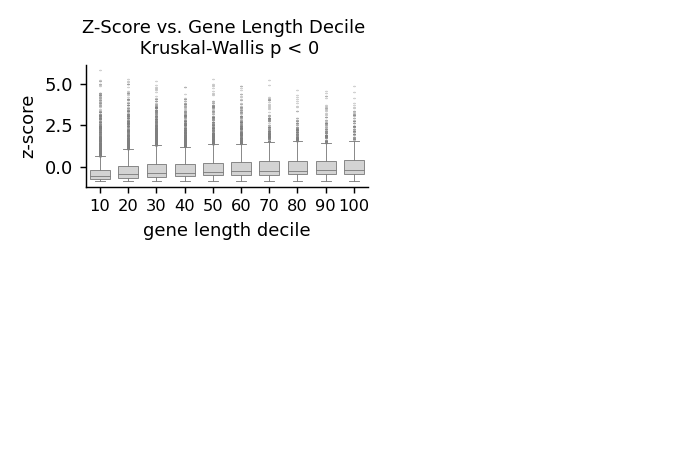

In [34]:
# Plot Z-Score vs. Gene Length (decile)
f, ax = plt.subplots(figsize=(3,2), tight_layout=True)
sns.despine()
#sns.set_palette("husl")

#anova_p = stats.f_oneway(*(df_length[df_length['percentile'] == p]['z_score'].dropna() for p in np.linspace(10, 100, 10)))
kruskal_p = stats.kruskal(*(df_length[df_length['percentile'] == p]['z_score'].dropna() for p in np.linspace(10, 100, 10)))

ax = sns.boxplot(data=df_length, x = 'percentile', y = 'z_score', linewidth=0.5, fliersize=0.1, width=0.7, color="lightgray")
ax.set_xlabel('gene length decile', fontsize=10)
ax.set_ylabel('z-score', fontsize=10)
ax.set_xticklabels(np.linspace(10,100, 10).astype(int), size=9)
ax.set_title('Z-Score vs. Gene Length Decile \n Kruskal-Wallis p < %.2g' % kruskal_p.pvalue, fontsize=10)

#f.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene_length_decile.vs.z-score.pdf', transparent=True)

In [35]:
## Plotting Z-Scores vs. Gene Length:

# Get deciles of Gene Lengths:
## Where the deciles are EVENLY binned, i.e. sort the data by gene length, and slice evenly
df_length = df_length.sort_values(by='longest_isoform').reset_index()

length_bins = np.linspace(0,df_length.shape[0], 20).astype(int)
print(length_bins)

# Subset df by mean read counts (deciles):
length_deciles = []
for index, p in enumerate(length_bins[0:len(length_bins)-1]):
    lower = p
    upper = length_bins[index + 1]
    df_subset = df_length.iloc[lower:upper]
    #df_subset = df['data_qvalues'][df['mean_read_counts'].between(lower, upper)].to_frame()
    df_subset['percentile'] = (index + 1) * 5
    length_deciles.append(df_subset)
    
df_pctile_vals = pd.concat(length_deciles, ignore_index=True)

[    0  1237  2474  3711  4948  6185  7422  8660  9897 11134 12371 13608
 14845 16083 17320 18557 19794 21031 22268 23506]


<ipython-input-35-3c2c58dc030a>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['percentile'] = (index + 1) * 5


<IPython.core.display.Javascript object>


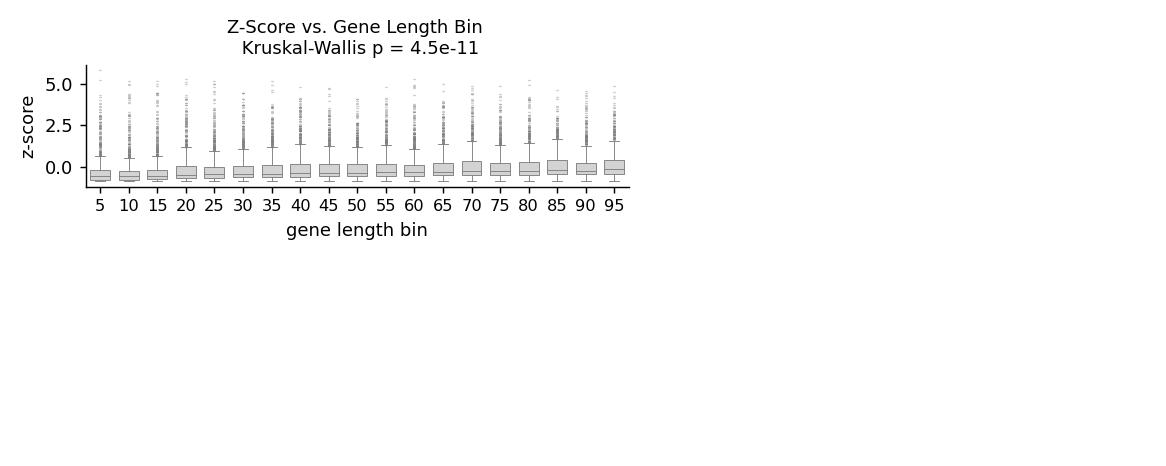

In [37]:
# Plot Z-Score vs. Gene Length (bins)
f, ax = plt.subplots(figsize=(5,2), tight_layout=True)
sns.despine()

#anova_p = stats.f_oneway(*(df_pctile_vals[df_pctile_vals['percentile'] == p]['z_score'].dropna() for p in np.linspace(5, 95, 19)))
kruskal_p = stats.kruskal(*(df_pctile_vals[df_pctile_vals['percentile'] == p]['z_score'].dropna() for p in np.linspace(5, 95, 19)))

ax = sns.boxplot(data=df_pctile_vals, x = 'percentile', y = 'z_score', linewidth=0.5, fliersize=0.1, width=0.7, color="lightgray")
ax.set_xlabel('gene length bin', fontsize=10)
ax.set_ylabel('z-score', fontsize=10)
ax.set_xticklabels(np.linspace(5, 95, 19).astype(int), size=9)
ax.set_title('Z-Score vs. Gene Length Bin \n Kruskal-Wallis p = %.2g' % anova_p.pvalue, fontsize=10)
             
#f.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene_length_bins.vs.z-score.pdf', transparent=True)

<IPython.core.display.Javascript object>


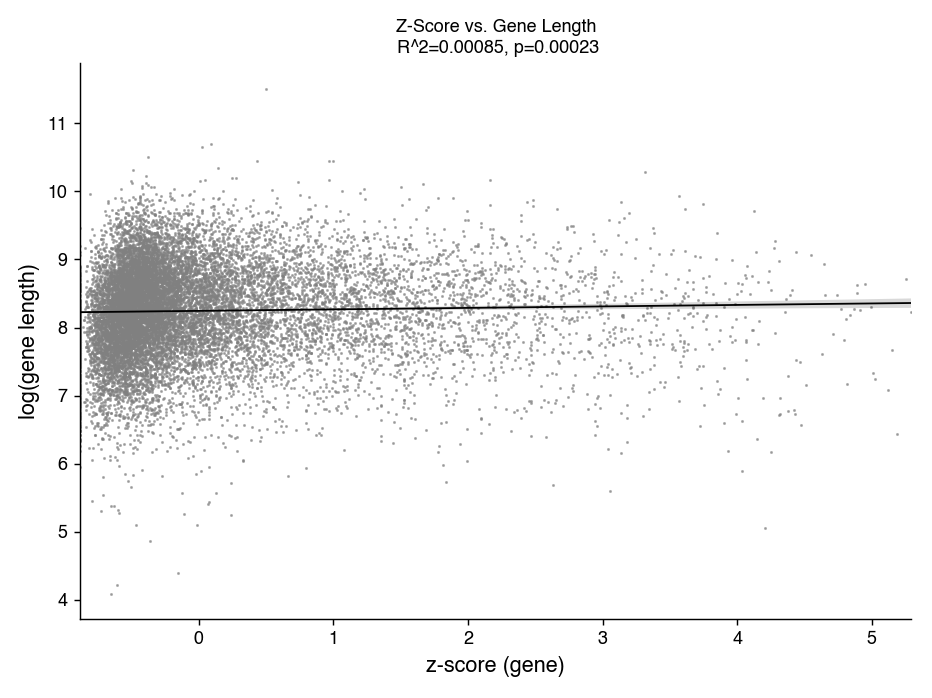

In [61]:
f, ax = plt.subplots(figsize=(4,3), tight_layout=True)
sns.despine()

#df = df.dropna()

slope, intercept, r_value, p_value, std_err = stats.linregress(df_protein['z_score'],np.log(df_protein['longest_isoform']))
r_squared = r_value ** 2

ax = sns.regplot(data=df, x=df_protein['z_score'], y=np.log(df_protein['longest_isoform']), fit_reg=True, truncate=True, ci=95, scatter_kws={"color":"grey", "s": 0.5, "alpha": 0.6, 'rasterized':True}, line_kws={"color":"black", "lw":1})
ax.set_xlabel('z-score (gene)', fontsize=12, fontweight='light')
ax.set_ylabel('log(gene length)', fontsize=12, fontweight='light')
ax.set_title('Z-Score vs. Gene Length\n R^2={0:.2g}, p={1:.2g}'.format(r_squared,p_value), fontsize=10)
#ax.set_ylim(0,5000)


#f.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene_length.vs.z-score_regplot.protein-coding.pdf', dpi=400, transparent=True)


In [40]:
df.head()

,GENE_ID,z_score,longest_isoform,median_tpms,gene_length_by_tpm
0,ENSG00000228794,0.315991,8694,5.943850,1252.043175
1,ENSG00000223764,0.915775,1389,2.177720,437.105849
2,ENSG00000188976,-0.276891,2633,54.511350,47.431741
3,ENSG00000187961,-0.399756,2910,12.104000,222.069597
4,ENSG00000187583,-0.325026,2560,0.683007,1521.086507


In [45]:
## Subset RME and Biallelic genes (and 'Unknown'):

df['mosaic_category'] = np.where(df['z_score'] >= 0.74, 'RME', 'Unknown')
df['mosaic_category'] = np.where(df['z_score'] < 0, 'Biallelic', df['mosaic_category'])

df.head()


,GENE_ID,z_score,longest_isoform,median_tpms,gene_length_by_tpm,mosaic_category
0,ENSG00000228794,0.315991,8694,5.943850,1252.043175,Unknown
1,ENSG00000223764,0.915775,1389,2.177720,437.105849,RME
2,ENSG00000188976,-0.276891,2633,54.511350,47.431741,Biallelic
3,ENSG00000187961,-0.399756,2910,12.104000,222.069597,Biallelic
4,ENSG00000187583,-0.325026,2560,0.683007,1521.086507,Biallelic


<IPython.core.display.Javascript object>


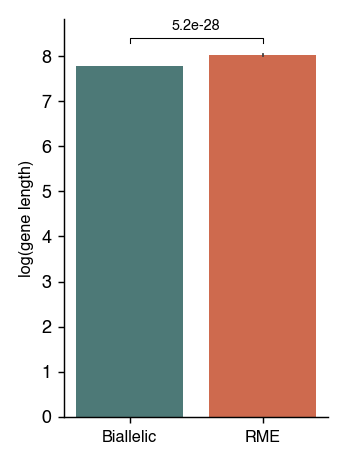

In [54]:
## Plot boxplot of Biallelic vs. RME genes for median TPMs:

f, ax = plt.subplots(figsize=(1.5, 2), tight_layout=True)
sns.despine()

#kw_pval = stats.kruskal(chromHMM_count[chromHMM_count['mosaic_category'] == 'RME']['state_label_mnemonic'], chromHMM_count[chromHMM_count['mosaic_category'] == 'Biallelic']['state_label_mnemonic'], nan_policy='omit')
f_oneway = stats.f_oneway(df[df['mosaic_category'] == 'Biallelic']['longest_isoform'], df[df['mosaic_category'] == 'RME']['longest_isoform'])

ax = sns.barplot(x='mosaic_category', y=np.log1p(df['longest_isoform']), data=df[df['mosaic_category'] != 'Unknown'], order=["Biallelic", "RME"], palette=["#46807D","#E35E39"], ci=68, errwidth=1)
ax.plot([0, 0, 1, 1], [8.3, 8.4, 8.4, 8.3], lw=0.6, c='k')
ax.text(0.5, 8.5, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("log(gene length)", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RME'], fontsize=9)

#plt.show()

#plt.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene_length.vs.z-score_barplot.ci68.pdf', transparent=True)


In [56]:
## Optional: Subset only protein-coding genes: 

protein_coding = pd.read_csv('~/Documents/Projects_and_Data/GTEx_HaplotypeExpression/GeneHancer_analyses/GTEX-ALL_SAMPLES.v8.all-tissues.gene_info.zscores.proteincoding.final.txt', sep='\t')
print(protein_coding.head())

protein_coding_genes = np.array(protein_coding['GENE_ID.v2'])

df_protein = df.loc[df['GENE_ID'].isin(protein_coding_genes)]

print(df_protein.shape)
df_protein.head()


  CHR       GENE_ID.v2             GENE_ID GENE_NAME  gene_start  gene_stop  \
0   1  ENSG00000188976  ENSG00000188976.10     NOC2L      944581     959309   
1   1  ENSG00000187961  ENSG00000187961.13    KLHL17      960586     965715   
2   1  ENSG00000187583  ENSG00000187583.10   PLEKHN1      966496     975108   
3   1  ENSG00000131591  ENSG00000131591.17  C1orf159     1081817    1116361   
4   1  ENSG00000078808  ENSG00000078808.16      SDF4     1216907    1232031   

   total_sample_count   z_score  
0                 532 -0.276891  
1                 473 -0.399756  
2                 566 -0.325026  
3                 638 -0.377295  
4                 626 -0.068051  
(16052, 6)


,GENE_ID,z_score,longest_isoform,median_tpms,gene_length_by_tpm,mosaic_category
2,ENSG00000188976,-0.276891,2633,54.511350,47.431741,Biallelic
3,ENSG00000187961,-0.399756,2910,12.104000,222.069597,Biallelic
4,ENSG00000187583,-0.325026,2560,0.683007,1521.086507,Biallelic
5,ENSG00000131591,-0.377295,4685,8.134765,512.875810,Biallelic
7,ENSG00000078808,-0.068051,2228,129.835500,17.029017,Biallelic


<IPython.core.display.Javascript object>


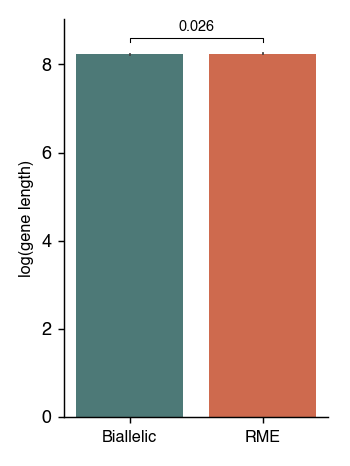

In [59]:
## Plot boxplot of Biallelic vs. RME genes for gene length:

f, ax = plt.subplots(figsize=(1.5, 2), tight_layout=True)
sns.despine()

#kw_pval = stats.kruskal(chromHMM_count[chromHMM_count['mosaic_category'] == 'RME']['state_label_mnemonic'], chromHMM_count[chromHMM_count['mosaic_category'] == 'Biallelic']['state_label_mnemonic'], nan_policy='omit')
f_oneway = stats.f_oneway(df_protein[df_protein['mosaic_category'] == 'Biallelic']['longest_isoform'], df_protein[df_protein['mosaic_category'] == 'RME']['longest_isoform'])

ax = sns.barplot(x='mosaic_category', y=np.log1p(df_protein['longest_isoform']), data=df_protein[df_protein['mosaic_category'] != 'Unknown'], order=["Biallelic", "RME"], palette=["#46807D","#E35E39"], ci=68, errwidth=1)
ax.plot([0, 0, 1, 1], [8.5, 8.6, 8.6, 8.5], lw=0.6, c='k')
ax.text(0.5, 8.7, "%.2g" % f_oneway.pvalue, ha='center', va='bottom', color='k', fontsize=8)
ax.set_ylabel("log(gene length)", fontsize=9, fontweight='light')
ax.set_xlabel("")
ax.set_xticklabels(['Biallelic', 'RME'], fontsize=9)

#plt.show()

#plt.savefig('../QC_SupplementalFigures/GTEX-ALL_SAMPLES.v8.phASER_WASP.gene_length.vs.z-score_barplot.protein-coding.ci68.pdf', transparent=True)
